import stuff

In [1]:
import pandas as pd
import matplotlib
import seaborn


Load the csv dataset into a pandas dataframe

In [5]:
df = pd.read_csv(r'C:\Users\Manhal.Moussa\Documents\GitHub\ML_FraudDetection\Data\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.isnull().any().any()

False

explore the data in columns V1 to V28

                Time            V1            V2            V3            V4   
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9   
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

c:\Users\Manhal.Moussa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


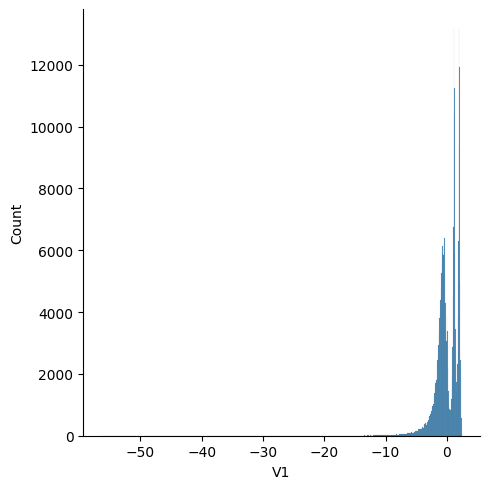

In [24]:
print(df.describe())
seaborn.displot(df['V1'])

Elminate the rows with values outside 2 standard deviation from the mean

In [31]:
# get the columns
columns = df.columns
# drop the unwanted columns
columns = columns.drop(['Time','Amount','Class'])
for column in columns:
    # Get the standard deviation and the mean for each column
    std = df[column].std()
    mean = df[column].mean()
    # calculate the limits for outliers 
    max_limit = mean + 2*std
    min_limit = mean-2*std
    # Delete the entire row of the outlier 
    df = df.loc[(df[column]>= min_limit) & (df[column]<=max_limit)]

<class 'pandas.core.series.Series'>
